In [377]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


[[0.0000e+00 4.0902e+04]
 [2.0000e+01 4.0906e+04]
 [4.0000e+01 4.0908e+04]
 ...
 [4.5850e+04 4.0379e+04]
 [4.5870e+04 4.0384e+04]
 [4.5890e+04 4.0394e+04]]


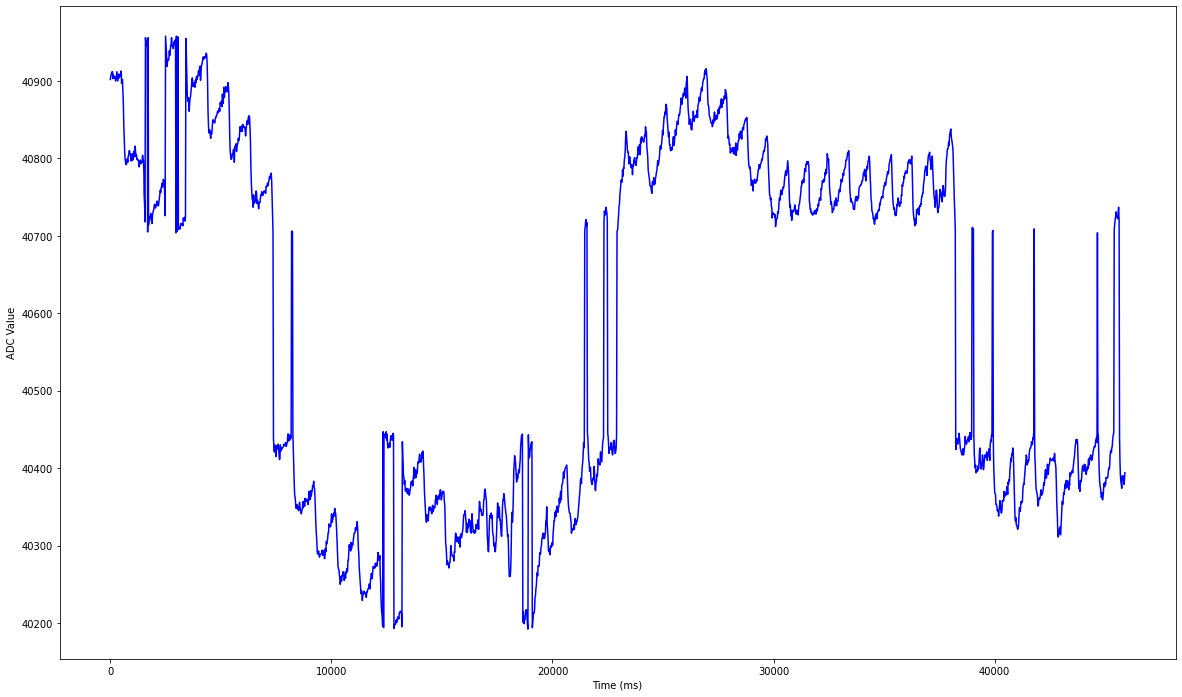

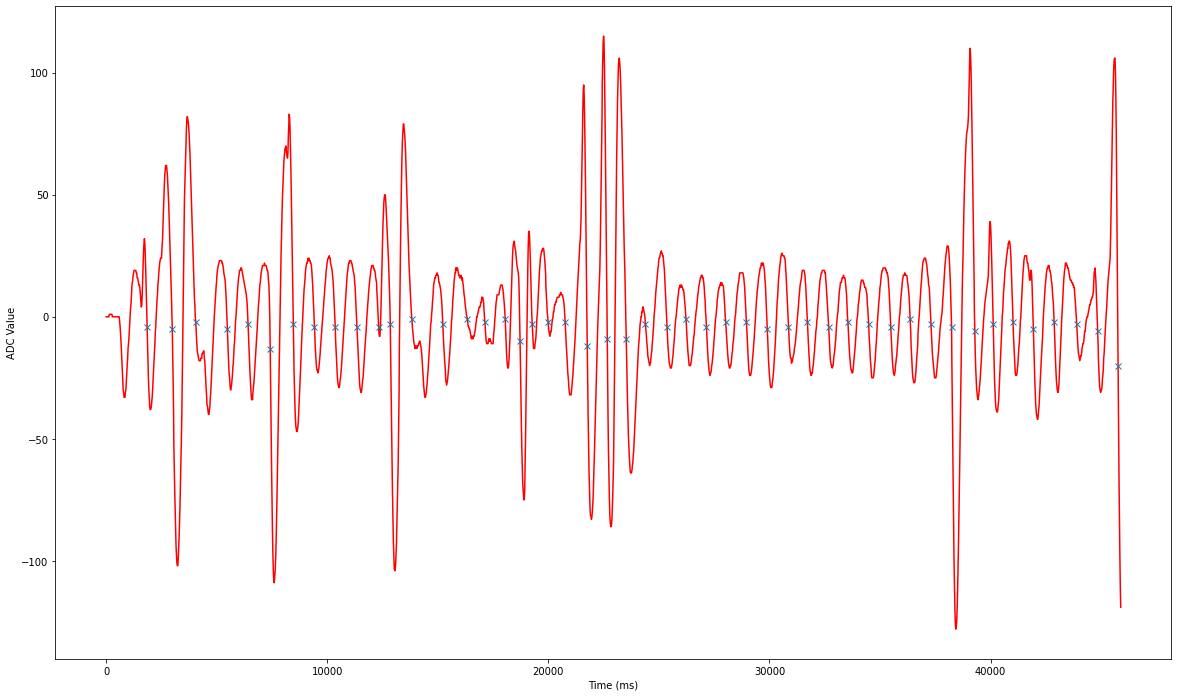

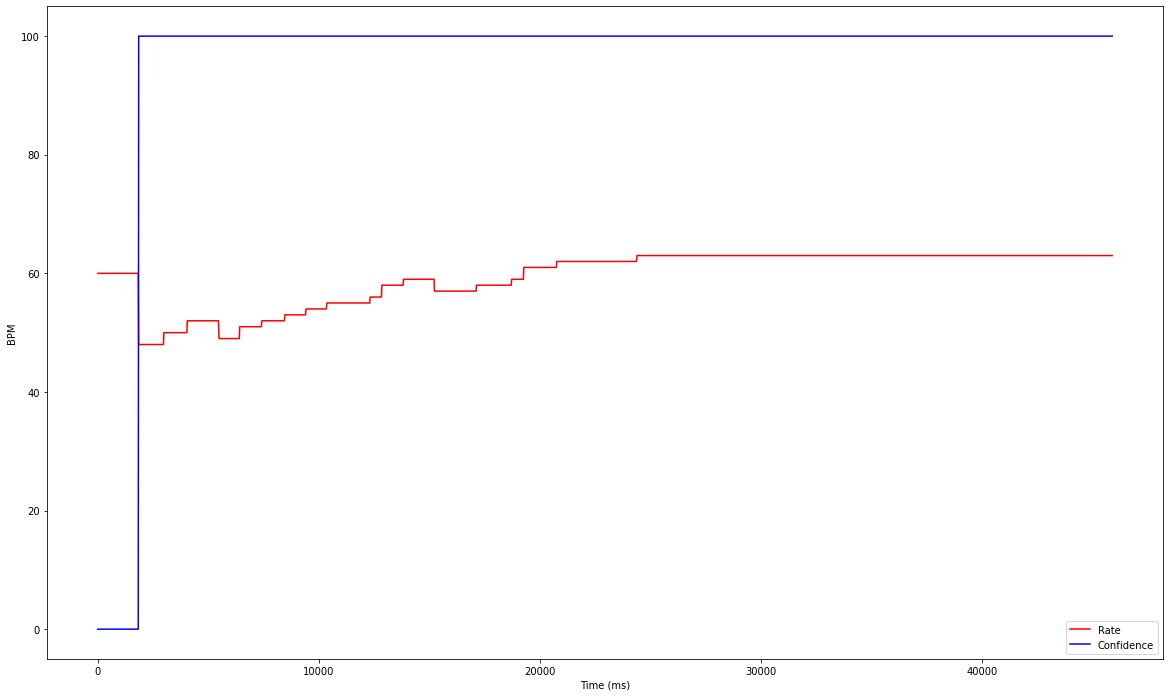

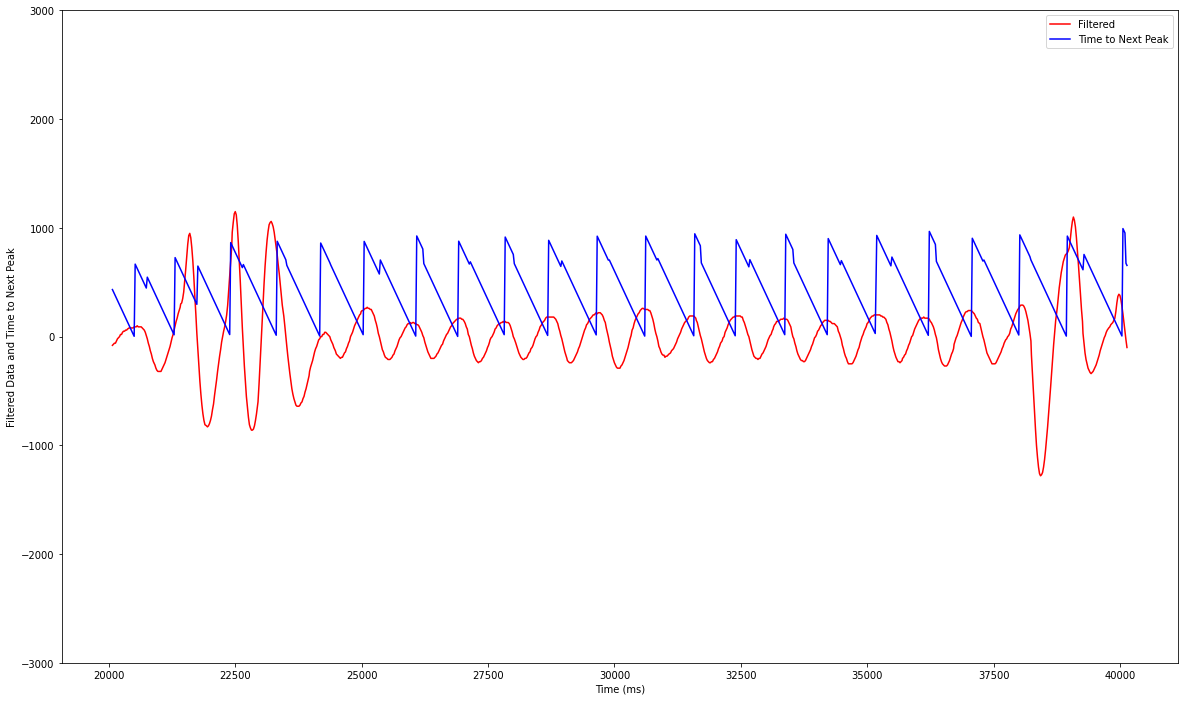

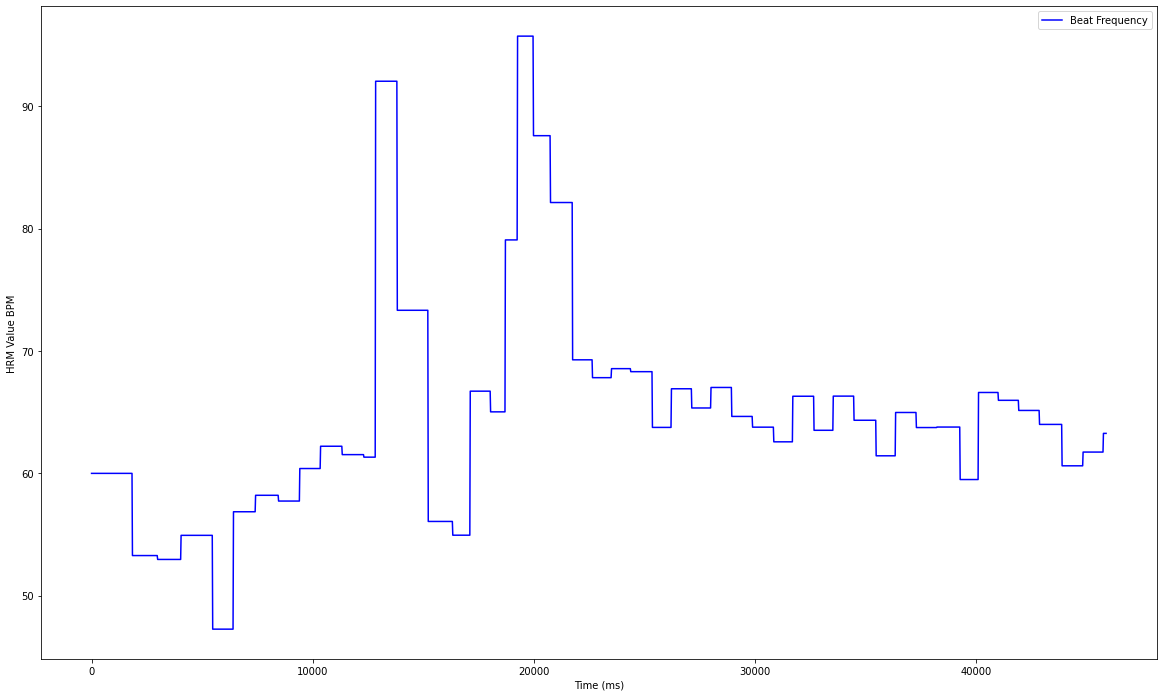

In [378]:
# Open data file in evaluations/HRMAnalysisCPP/filtered_data.txt

input_data = np.loadtxt('../HRMAnalysisCPP/input_data.txt', delimiter=' ')
filtered_data = np.loadtxt('../HRMAnalysisCPP/filtered_data.txt', delimiter=' ')

# Set plot size
mpl.rcParams['figure.figsize'] = (20,12)

timestamps = filtered_data[:,0]
red_led_adc_values = filtered_data[:,1]
zero_crossing_times_ms = filtered_data[:,2]
zero_crossings = np.where(zero_crossing_times_ms > 0)[0]
rate_bpm = filtered_data[:,3]
rate_confidence = filtered_data[:,4]
time_to_next_peak_ms = filtered_data[:,5]
beat_freq_hz = filtered_data[:,6]

print(input_data)

# Plot input data
plt.plot(input_data[:,0], input_data[:,1], 'b', label='Input')
plt.xlabel('Time (ms)')
plt.ylabel('ADC Value')
plt.show()

# Plot filtered data
plt.plot(timestamps, red_led_adc_values, 'r', label='Filtered')
plt.plot(timestamps[zero_crossings], red_led_adc_values[zero_crossings], "x")
plt.xlabel('Time (ms)')
plt.ylabel('ADC Value')
plt.show()

# Plot rate and confidence on same axes
plt.plot(timestamps, rate_bpm, 'r', label='Rate')
plt.plot(timestamps, rate_confidence, 'b', label='Confidence')
plt.xlabel('Time (ms)')
plt.ylabel('BPM')
plt.legend()
plt.show()

# Plot points of filtered data and time to next peak on same axes
st = 1000
ln = 1000
plt.plot(timestamps[st:st+ln], red_led_adc_values[st:st+ln] * 10, 'r', label='Filtered')
plt.plot(timestamps[st:st+ln], time_to_next_peak_ms[st:st+ln], 'b', label='Time to Next Peak')
# Limit Y axis to +/-3000
plt.ylim(-3000,3000)
plt.xlabel('Time (ms)')
plt.ylabel('Filtered Data and Time to Next Peak')
plt.legend()
plt.show()

# Plot points of beat frequency 
plt.plot(timestamps, beat_freq_hz * 60, 'b', label='Beat Frequency')
plt.xlabel('Time (ms)')
plt.ylabel('HRM Value BPM')
plt.legend()
plt.show()

